In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv(os.path.join("..", "data", "merged_output", "Comal_J17_J27.csv"))
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,Comal River,Comal Rv (nc),Comal Rv (oc),springflow,MaxLevel_J17,MaxLevel_J27
0,2014-05-06,116.0,61.9,50.7,118.0,632.095,830.749
1,2014-05-07,116.0,54.1,50.1,116.0,631.673,830.637
2,2014-05-08,113.0,52.2,51.3,115.0,631.839,830.498
3,2014-05-09,118.0,54.1,52.6,115.0,632.492,830.361
4,2014-05-10,113.0,52.2,53.2,116.0,633.265,830.352


In [9]:
X, y = np.array(df['datetime'].tolist()), np.array(df['MaxLevel_J17'].tolist()) # make these list like arrays
d = np.array(df['datetime'].apply(lambda x: x.toordinal()).tolist())
hour = np.array(df['datetime'].apply(lambda x: x.hour).tolist())
month = np.array(df['datetime'].apply(lambda x: x.month).tolist())


In [10]:
X1 = []
for i in range(len(X)):
    X1.append(np.array([d[i], hour[i], month[i]])) # eventually we can add more input data here
X1 = np.array(X1)
print("X1 Shape is ", X1.shape)

X1 Shape is  (1579, 3)


In [11]:
train_X, test_X, train_y, test_y = train_test_split(X1, y, test_size=0.5, random_state=123)
print("Labels for training and testing data")
print("Train Y shape: ", train_y.shape)
print("Test  Y shape: ", test_y.shape)

Labels for training and testing data
Train Y shape:  (789,)
Test  Y shape:  (790,)


In [12]:
k = 20 # ?? I dont know what is best to use yet
knn = KNeighborsRegressor(n_neighbors=k) # use regressor for this kind of data
knn.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

In [13]:
# # TODO: look at correlation matrix, predict future by feeding array of the shape (day, hr, month)
# # Like the following:
# future_time = [[5,9,7]] # 5th of July at 9 am
# future_time = np.array(future_time)

In [14]:
y_pred = knn.predict(future_time)
print(y_pred)

[637.7178]


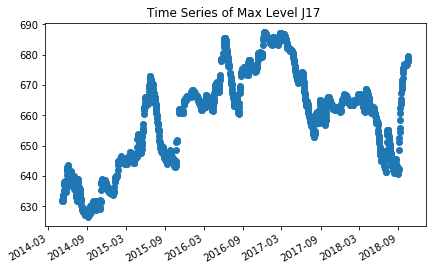

In [16]:
fig, ax = plt.subplots()
plt.plot_date(df['datetime'], df['MaxLevel_J17'])
ax.set_title('Time Series of Max Level J17 ')
fig.tight_layout()
plt.savefig(os.path.join("..", "img", "J17_time.png"))
fig.autofmt_xdate()
plt.show()